In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def print_full_rows(x):
    pd.set_option('display.max_rows', len(x))
    return x
    pd.reset_option('display.max_rows')
    
def print_full_columns(x):
    pd.set_option('display.max_columns', len(x.columns))
    return x
    pd.reset_option('display.max_rows')

In [ ]:
df = pd.read_csv('2019_01.csv', parse_dates = ['Trip Start Timestamp', 'Trip End Timestamp'])

### Community Area Mapping Dictionary

In [ ]:
community_codes = pd.read_csv('CommAreas.csv')
community_codes_dict = community_codes[['AREA_NUMBE', 'COMMUNITY']]
pickup_community_dict = community_codes_dict.rename({'AREA_NUMBE':'Pickup Community Area'}, axis = 1) 
dropoff_community_dict = community_codes_dict.rename({'AREA_NUMBE':'Dropoff Community Area'}, axis =1)

# Exploratory Data Analysis

### Which area tips the most?

In [ ]:
highest_tipping_hood = df.groupby('Pickup Community Area').agg({'Tip':'mean'}).reset_index()
highest_tipping_hood['Pickup Community Area'] = highest_tipping_hood['Pickup Community Area'].astype(int)
highest_tipping_hood

,Pickup Community Area,Tip
0,1,0.498893
1,2,0.340495
2,3,0.495705
3,4,0.634181
4,5,0.554420
...,...,...
72,73,0.169825
73,74,0.586106
74,75,0.300485
75,76,1.837740


In [ ]:
pickup_community_dict = community_codes_dict.rename({'AREA_NUMBE':'Pickup Community Area'}, axis = 1) 

In [ ]:
#joining with community area code dictionary
highest_tipping_hood_df = pd.merge(highest_tipping_hood, pickup_community_dict, on = 'Pickup Community Area', how = 'left')
highest_tipping_hood_df_sorted = highest_tipping_hood_df.sort_values(by = 'Tip', ascending = False)
highest_tipping_hood_df_sorted

,Pickup Community Area,Tip,COMMUNITY
75,76,1.837740,OHARE
55,56,1.601293,GARFIELD RIDGE
8,9,0.708537,EDISON PARK
11,12,0.677551,FOREST GLEN
3,4,0.634181,LINCOLN SQUARE
...,...,...,...
39,40,0.130601,WASHINGTON PARK
68,69,0.127724,GREATER GRAND CROSSING
66,67,0.106716,WEST ENGLEWOOD
67,68,0.106440,ENGLEWOOD


<BarContainer object of 77 artists>

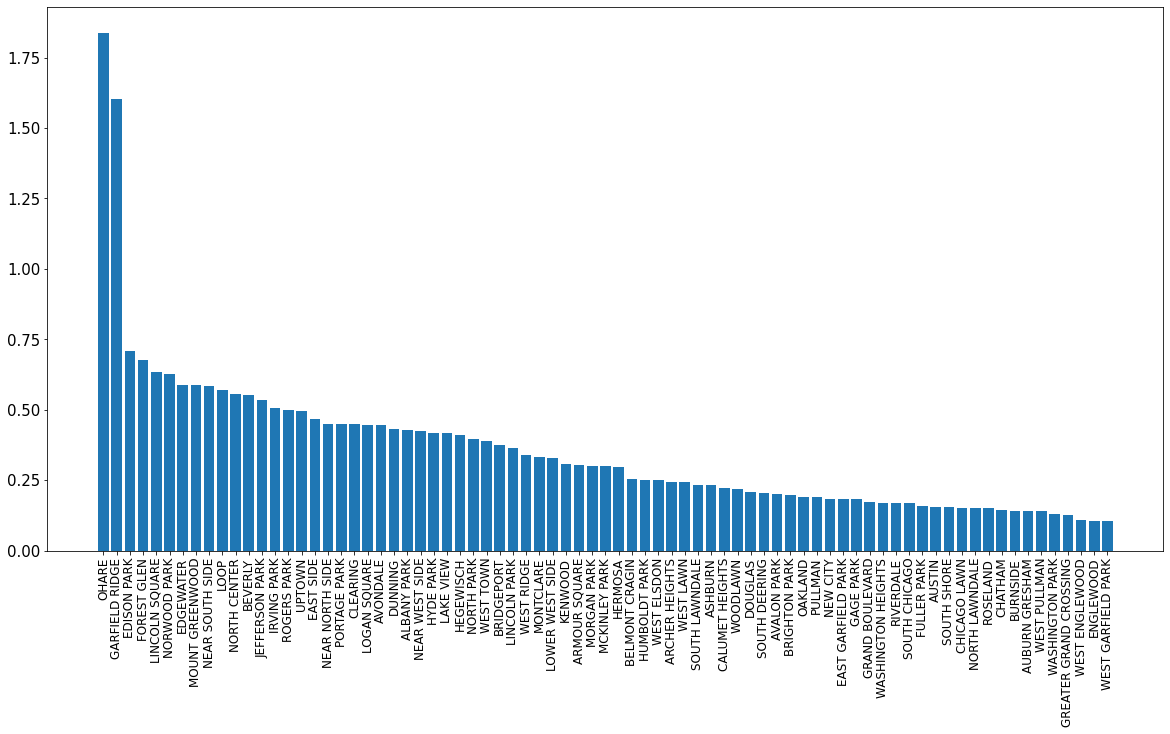

In [ ]:
#Visualizing the result

plt.figure(figsize = (20, 10))
plt.tick_params(axis = 'x', labelsize = 12, labelrotation = 90)
plt.tick_params(axis = 'y', labelsize = 15)
plt.bar(highest_tipping_hood_df_sorted['COMMUNITY'], highest_tipping_hood_df_sorted['Tip'])

### Which area has longest rides on average?

In [ ]:
df.columns

Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [ ]:
longest_rides_hood = df.groupby('Pickup Community Area').agg({'Trip Miles':'mean'}).reset_index()
longest_rides_hood['Pickup Community Area'] = longest_rides_hood['Pickup Community Area'].astype(int)
longest_rides_hood

,Pickup Community Area,Trip Miles
0,1,5.481820
1,2,5.374340
2,3,4.937603
3,4,4.783284
4,5,4.610863
...,...,...
72,73,6.698672
73,74,6.208017
74,75,6.835694
75,76,18.094702


In [ ]:
#joining with community area code dictionary
longest_rides_hood_df = pd.merge(longest_rides_hood, pickup_community_dict, on = 'Pickup Community Area', how = 'left')
longest_rides_hood_df_sorted = longest_rides_hood_df.sort_values(by = 'Trip Miles', ascending = False)
longest_rides_hood_df_sorted

,Pickup Community Area,Trip Miles,COMMUNITY
75,76,18.094702,OHARE
55,56,14.244984,GARFIELD RIDGE
53,54,9.383282,RIVERDALE
54,55,9.145784,HEGEWISCH
51,52,8.059364,EAST SIDE
...,...,...,...
27,28,4.287669,NEAR WEST SIDE
21,22,4.205385,LOGAN SQUARE
7,8,4.107646,NEAR NORTH SIDE
23,24,3.868102,WEST TOWN


<BarContainer object of 77 artists>

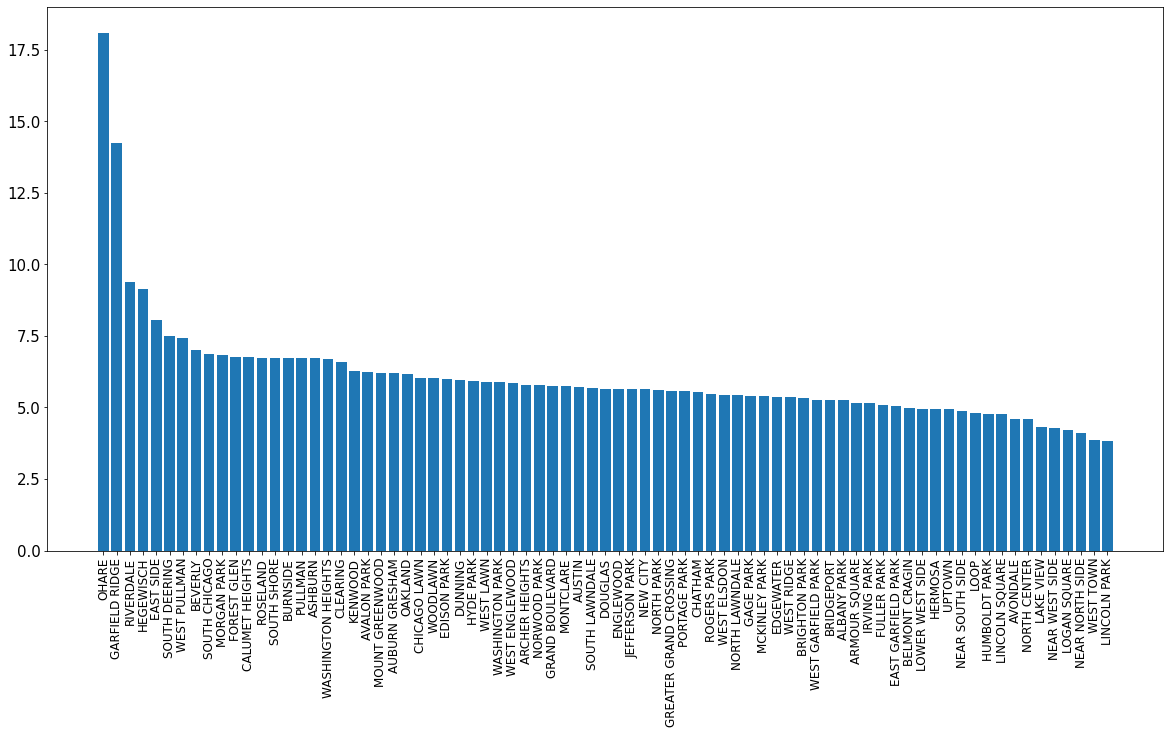

In [ ]:
#Visualizing the result

plt.figure(figsize = (20, 10))
plt.tick_params(axis = 'x', labelsize = 12, labelrotation = 90)
plt.tick_params(axis = 'y', labelsize = 15)
plt.bar(longest_rides_hood_df_sorted['COMMUNITY'], longest_rides_hood_df_sorted['Trip Miles'])

### Timeseries visualization

In [ ]:
df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,cec10f3125b3baa28c0fd543a5c199a3fd449ac8,2019-01-01,2019-01-01 00:15:00,661.0,2.7,1.703124e+10,1.703183e+10,24.0,28.0,7.5,...,2.5,10.0,False,1,41.899670,-87.669838,POINT (-87.6698377982 41.8996701799),41.879067,-87.657005,POINT (-87.657005027 41.8790669938)
1,cee0426420b6c47f4326d7e43ee65a2556cabb72,2019-01-01,2019-01-01 00:30:00,1960.0,21.1,1.703184e+10,NaN,27.0,NaN,22.5,...,2.5,25.0,True,2,41.871620,-87.705553,POINT (-87.7055526328 41.87161966),NaN,NaN,NaN
2,ceeb99a7167bd266a5ad3bf7b79b4a545daa007b,2019-01-01,2019-01-01 00:15:00,999.0,7.9,NaN,NaN,49.0,46.0,17.5,...,0.0,17.5,True,1,41.706588,-87.623367,POINT (-87.6233665115 41.7065878819),41.741243,-87.551428,POINT (-87.551428197 41.7412427285)
3,cef350e1eddeb232dcf69996bd0c6e8d3814d3ed,2019-01-01,2019-01-01 00:15:00,686.0,3.3,NaN,NaN,22.0,24.0,7.5,...,2.5,10.0,False,1,41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
4,cf3aae748133a1abd805ba504841b09c0b1f024a,2019-01-01,2019-01-01 00:15:00,233.0,0.4,1.703132e+10,1.703133e+10,32.0,33.0,2.5,...,2.5,5.0,False,1,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)


In [ ]:
time_feature_df = df.copy()

In [ ]:
time_feature_df['year'] = time_feature_df['Trip Start Timestamp'].dt.year
time_feature_df['month'] = time_feature_df['Trip Start Timestamp'].dt.month
time_feature_df['day'] = time_feature_df['Trip Start Timestamp'].dt.day
time_feature_df['hour'] = time_feature_df['Trip Start Timestamp'].dt.hour
time_feature_df['minute'] = time_feature_df['Trip Start Timestamp'].dt.minute
time_feature_df['dayofweek'] = time_feature_df['Trip Start Timestamp'].dt.dayofweek
time_feature_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,year,month,day,hour,minute,dayofweek
0,cec10f3125b3baa28c0fd543a5c199a3fd449ac8,2019-01-01,2019-01-01 00:15:00,661.0,2.7,1.703124e+10,1.703183e+10,24.0,28.0,7.5,...,POINT (-87.6698377982 41.8996701799),41.879067,-87.657005,POINT (-87.657005027 41.8790669938),2019,1,1,0,0,1
1,cee0426420b6c47f4326d7e43ee65a2556cabb72,2019-01-01,2019-01-01 00:30:00,1960.0,21.1,1.703184e+10,NaN,27.0,NaN,22.5,...,POINT (-87.7055526328 41.87161966),NaN,NaN,NaN,2019,1,1,0,0,1
2,ceeb99a7167bd266a5ad3bf7b79b4a545daa007b,2019-01-01,2019-01-01 00:15:00,999.0,7.9,NaN,NaN,49.0,46.0,17.5,...,POINT (-87.6233665115 41.7065878819),41.741243,-87.551428,POINT (-87.551428197 41.7412427285),2019,1,1,0,0,1
3,cef350e1eddeb232dcf69996bd0c6e8d3814d3ed,2019-01-01,2019-01-01 00:15:00,686.0,3.3,NaN,NaN,22.0,24.0,7.5,...,POINT (-87.6991553432 41.9227606205),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),2019,1,1,0,0,1
4,cf3aae748133a1abd805ba504841b09c0b1f024a,2019-01-01,2019-01-01 00:15:00,233.0,0.4,1.703132e+10,1.703133e+10,32.0,33.0,2.5,...,POINT (-87.6221729369 41.8706073724),41.859350,-87.617358,POINT (-87.6173580061 41.859349715),2019,1,1,0,0,1


# 24 Hours in a day

In [ ]:
## Group by hour to show the count of rides
hour_df = time_feature_df.groupby('hour').agg({'month':'sum'}).reset_index()
hour_df = hour_df.rename({'month':'Count of Rides'}, axis = 1)

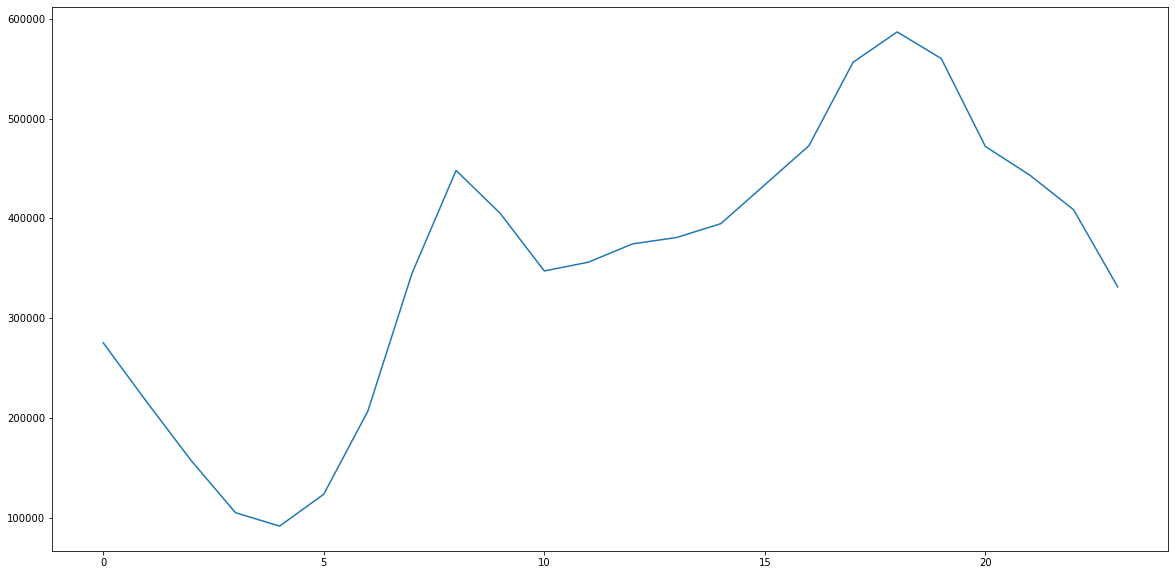

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(hour_df['hour'], hour_df['Count of Rides'])

# Days of the month

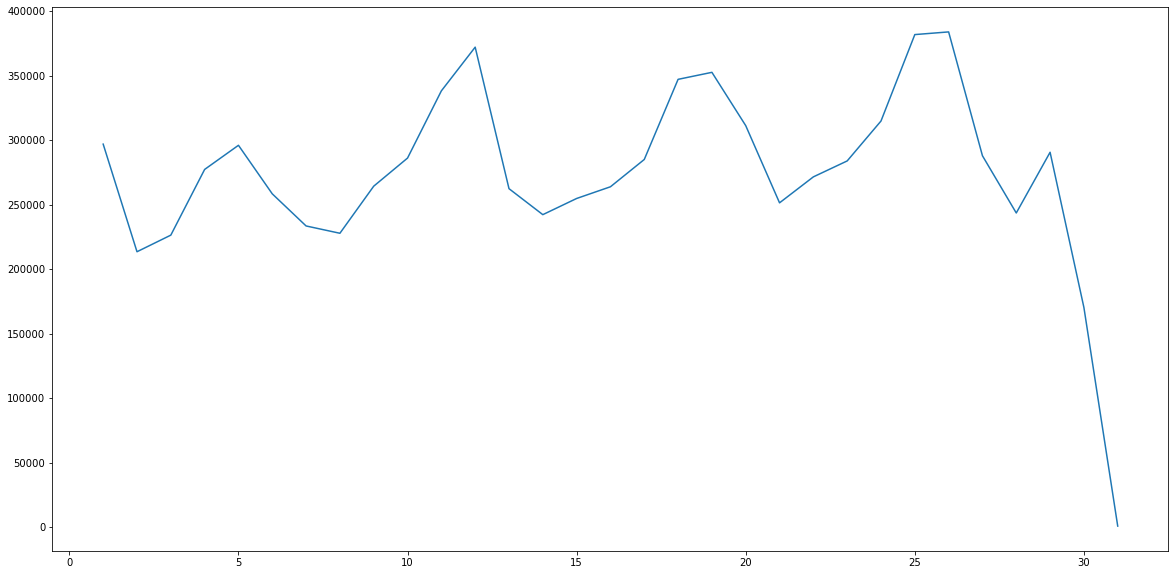

In [ ]:
## Group by day to show the count of rides
day_df = time_feature_df.groupby('day').agg({'month':'sum'}).reset_index()
day_df = day_df.rename({'month':'Count of Rides'}, axis = 1)
plt.figure(figsize = (20, 10))
plt.plot(day_df['day'], day_df['Count of Rides'])

# Days of the Week

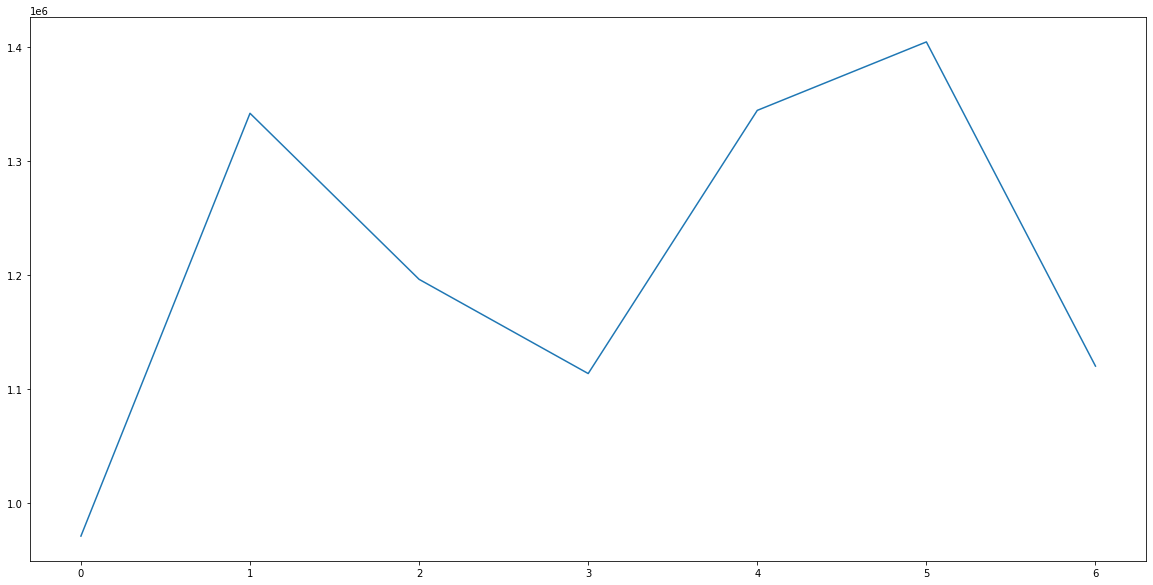

In [ ]:
## Group by day of week 
dayofweek_df = time_feature_df.groupby('dayofweek').agg({'month':'sum'}).reset_index()
dayofweek_df = dayofweek_df.rename({'month':'Count of Rides'}, axis = 1)
plt.figure(figsize = (20,10))
plt.plot(dayofweek_df['dayofweek'], dayofweek_df['Count of Rides'])

# Heatmap of communities

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
# set the filepath and load
fp = 'chicagoshape/geo_export_932ddab5-73ca-4da9-88b4-a10b650fc3bf.shp'
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.community.nunique()

77

<AxesSubplot:>

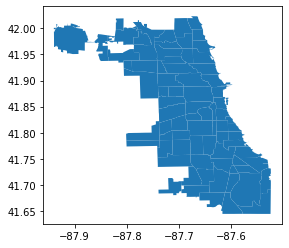

In [ ]:
sample = map_df.drop(['area', 'area_num_1', 'comarea', 'comarea_id'], axis = 1)
sample.plot()

In [ ]:
sample.head()

,area_numbe,community,perimeter,shape_area,shape_len,geometry
0,35,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,36,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,37,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,38,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,39,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [ ]:
monday_9am_df = time_feature_df.where(time_feature_df['hour'] == 15).dropna()
monday_9am_df

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,year,month,day,hour,minute,dayofweek
204305,ce2f2a6d2d7f9ab4c498ac0bd02131c309c1a25d,2019-01-01 15:00:00,2019-01-01 15:15:00,755.0,4.7,1.703167e+10,1.703144e+10,67.0,44.0,12.5,...,POINT (-87.6711548134 41.7666524081),41.748623,-87.601315,POINT (-87.6013151779 41.748623179),2019.0,1.0,1.0,15.0,0.0,1.0
204306,ce315a363fe01973dd5bf5566e04d01cd102b6bd,2019-01-01 15:00:00,2019-01-01 15:00:00,383.0,1.1,1.703121e+10,1.703121e+10,21.0,21.0,5.0,...,POINT (-87.7220523299 41.9337850524),41.935706,-87.703855,POINT (-87.7038545435 41.9357064711),2019.0,1.0,1.0,15.0,0.0,1.0
204308,ce64ed9b0e50a4305f7ba490197e1390f946fbe1,2019-01-01 15:00:00,2019-01-01 15:00:00,222.0,0.6,1.703184e+10,1.703183e+10,24.0,28.0,2.5,...,POINT (-87.6536139825 41.8983058696),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),2019.0,1.0,1.0,15.0,0.0,1.0
204309,ce6c371c43c8725028f212b6d677f5c2e6b1f0a7,2019-01-01 15:00:00,2019-01-01 15:15:00,1070.0,7.7,1.703184e+10,1.703141e+10,32.0,41.0,12.5,...,POINT (-87.6327464887 41.8809944707),41.797965,-87.589607,POINT (-87.5896070309 41.7979652088),2019.0,1.0,1.0,15.0,0.0,1.0
204311,ced7957bbc968baf54118ec8e378218981bff22c,2019-01-01 15:00:00,2019-01-01 15:00:00,479.0,1.6,1.703128e+10,1.703108e+10,28.0,8.0,5.0,...,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2019.0,1.0,1.0,15.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8418943,cd2f25c47bf763dd6ff96c21775bffb36ae4888c,2019-01-30 15:45:00,2019-01-30 16:15:00,1749.0,7.4,1.703184e+10,1.703106e+10,28.0,6.0,5.0,...,POINT (-87.6750856208 41.8704150003),41.936310,-87.651563,POINT (-87.6515625922 41.9363101308),2019.0,1.0,30.0,15.0,45.0,2.0
8418944,cd5496ee535ab21e4fa39b29244ae3bb6366d451,2019-01-30 15:45:00,2019-01-30 16:00:00,351.0,0.6,1.703184e+10,1.703108e+10,32.0,8.0,5.0,...,POINT (-87.6327464887 41.8809944707),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),2019.0,1.0,30.0,15.0,45.0,2.0
8418945,cd5c508f29763fd7ad3b3d0c0a183f5fa9e04c48,2019-01-30 15:45:00,2019-01-30 16:15:00,1468.0,18.0,1.703198e+10,1.703108e+10,76.0,8.0,30.0,...,POINT (-87.9030396611 41.9790708201),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019.0,1.0,30.0,15.0,45.0,2.0
8418946,cd785def6a21262a24771584db5da0bb8071cb3c,2019-01-30 15:45:00,2019-01-30 16:00:00,977.0,2.2,1.703116e+10,1.703122e+10,16.0,22.0,7.5,...,POINT (-87.7128142315 41.9502120955),41.921647,-87.689951,POINT (-87.689951469 41.9216471318),2019.0,1.0,30.0,15.0,45.0,2.0


In [ ]:
monday_9am_df = monday_9am_df.where(monday_9am_df['dayofweek'] == 4).dropna()

In [ ]:
heatmap_df = monday_9am_df.groupby('Pickup Community Area').agg({'month':'sum'}).reset_index()
heatmap_df = heatmap_df.rename({'Pickup Community Area':'area_numbe', 'month':'Counts of Rides'}, axis = 1)
heatmap_df

,area_numbe,Counts of Rides
0,1.0,422.0
1,2.0,321.0
2,3.0,895.0
3,4.0,422.0
4,5.0,393.0
...,...,...
71,73.0,86.0
72,74.0,6.0
73,75.0,68.0
74,76.0,1150.0


In [ ]:
sample['area_numbe'] = sample['area_numbe'].astype('float64')

In [ ]:
heatmap_final = pd.merge(sample, heatmap_df, on = 'area_numbe', how = 'outer')
heatmap_final

,area_numbe,community,perimeter,shape_area,shape_len,geometry,Counts of Rides
0,35.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",341.0
1,36.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",43.0
2,37.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",23.0
3,38.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",168.0
4,39.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",202.0
...,...,...,...,...,...,...,...
72,74.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",6.0
73,75.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",68.0
74,76.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",1150.0
75,77.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",561.0


<AxesSubplot:>

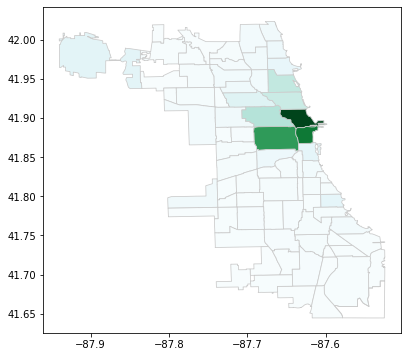

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
heatmap_final.plot(column='Counts of Rides', cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8')

In [ ]:
heatmap_final.sort_values('Counts of Rides', ascending = False).head(20)

,area_numbe,community,perimeter,shape_area,shape_len,geometry,Counts of Rides
36,8.0,NEAR NORTH SIDE,0.0,7.667590e+07,57293.164952,"POLYGON ((-87.62446 41.91157, -87.62459 41.911...",8365.0
37,32.0,LOOP,0.0,4.633557e+07,39428.672996,"POLYGON ((-87.60949 41.88940, -87.60949 41.889...",6875.0
28,28.0,NEAR WEST SIDE,0.0,1.584925e+08,53003.592941,"POLYGON ((-87.63759 41.88623, -87.63765 41.886...",5819.0
24,24.0,WEST TOWN,0.0,1.275629e+08,55203.718696,"POLYGON ((-87.65686 41.91078, -87.65685 41.910...",2555.0
44,6.0,LAKE VIEW,0.0,8.721480e+07,51973.096868,"POLYGON ((-87.64102 41.95480, -87.64101 41.954...",2310.0
67,7.0,LINCOLN PARK,0.0,8.831640e+07,49478.427771,"POLYGON ((-87.63182 41.93258, -87.63182 41.932...",2152.0
22,22.0,LOGAN SQUARE,0.0,1.000576e+08,49213.421749,"POLYGON ((-87.68284 41.93223, -87.68284 41.932...",1330.0
74,76.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",1150.0
33,33.0,NEAR SOUTH SIDE,0.0,4.976964e+07,45053.165104,"POLYGON ((-87.60914 41.84469, -87.60938 41.845...",1062.0
7,41.0,HYDE PARK,0.0,4.510538e+07,29746.708202,"POLYGON ((-87.58038 41.80253, -87.58040 41.802...",1040.0


# Feature engineering for Modeling

In [ ]:
model_df = pd.read_csv('model_data.csv')
model_df

,Unnamed: 0,Trip Start Timestamp,Pickup Community Area,month,day,hour
0,0,2019-01-01 00:00:00,24.0,1,1,0
1,1,2019-01-01 00:00:00,27.0,1,1,0
2,2,2019-01-01 00:00:00,49.0,1,1,0
3,3,2019-01-01 00:00:00,22.0,1,1,0
4,4,2019-01-01 00:00:00,32.0,1,1,0
...,...,...,...,...,...,...
17013007,8519464,2019-02-28 00:00:00,38.0,2,28,0
17013008,8519465,2019-02-28 00:00:00,25.0,2,28,0
17013009,8519466,2019-02-28 00:00:00,8.0,2,28,0
17013010,8519467,2019-02-28 00:00:00,8.0,2,28,0
